In [1]:
import pandas as pd

df = pd.read_csv("../data/data_processed/erp_sales_cleaned.csv")
df['order_date'] = pd.to_datetime(df['order_date'])


In [2]:
# Aggregate daily sales
daily_sales = df.groupby('order_date')['net_sales'].sum().reset_index()
daily_sales.rename(columns={'order_date': 'ds', 'net_sales': 'y'}, inplace=True)


In [3]:
# Top 10 customers
top_customers = df.groupby('customer_id')['net_sales'].sum().sort_values(ascending=False).head(10)
top_customers.to_csv("../reports/top_customers.csv", index=True)

# Top 10 products
top_products = df.groupby('product_id')['net_sales'].sum().sort_values(ascending=False).head(10)
top_products.to_csv("../reports/top_products.csv", index=True)


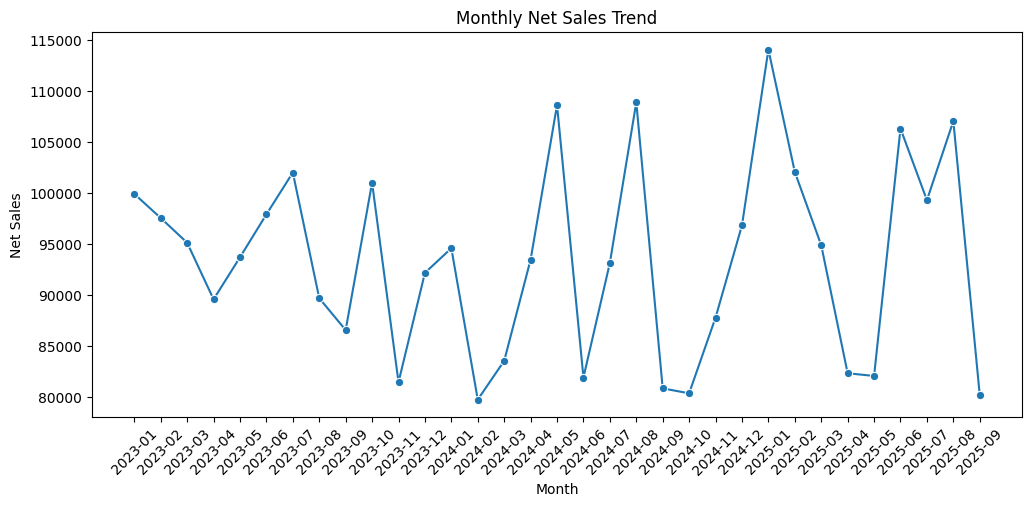

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Monthly sales trend
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['net_sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Net Sales Trend")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)

# Save figure
plt.savefig("../reports/monthly_sales_trend.png", bbox_inches='tight')
plt.show()
